# Metaverse Tweets Data from Kaggle.com

In [416]:
import pandas as pd
import numpy as np
#To covert user_created and date column to datetime format
MV=pd.read_csv('Metaverse_tweets.csv')
MV.user_created=MV.user_created.astype(str)
temp=MV['user_created'].tolist()
List=[]
for i in temp:
    i=i[:10]
    List.append(i)
List= pd.DataFrame(List, columns=['user_created'])
MV['user_created']=List['user_created']
MV['user_created'] = pd.to_datetime(MV['user_created'],  errors = 'coerce')
MV.date=MV.date.astype(str)
temp1=MV['date'].tolist()
List=[]
for i in temp1:
    i=i[:10]
    List.append(i)
List= pd.DataFrame(List, columns=['date'])
MV['date']=List['date']
MV['date'] = pd.to_datetime(MV['date'],  errors = 'coerce')
MV=MV.drop(['user_verified','is_retweet','source'],axis=1)
MV.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags
0,Sukatna,NaN,NaN,2021-09-24,2.0,116,94,2021-11-15,@Haris51659768 @KnightMonter11 I think in the ...,NaN
1,Onur Rhein 🔺,Wann Deutschland?,"Sular yükseldiğinde balıklar karıncaları yer, ...",2020-03-31,126.0,1401,40101,2021-11-15,@ernealist This is the new metaverse game proj...,"['PolkaWar', 'metaverse', 'airdrop', 'pwar']"
2,Garcia,NaN,NaN,2021-08-07,18.0,85,46,2021-11-15,#CatBoy called #SafeCatGirl !\n\nhttps://t.co/...,"['CatBoy', 'SafeCatGirl', 'BSCGems']"
3,Aryan Verma,"शिमला, भारत",https://t.co/CwUApCiRJo,2021-07-29,3.0,284,171,2021-11-15,Tell us what you love about #TerraBots with ha...,"['TerraBots', 'terrabots', 'metaverse', 'LUNAt..."
4,CryptoSun,香港,#Bitcoin,2012-04-18,175.0,369,162,2021-11-15,👉I just joined the @metavpad IDO Whitelist \n\...,NaN


In [417]:
#to convert user_followers,user_friends,user_favorites to integer type
MV['user_friends'] = pd.to_numeric(MV['user_friends'],errors = 'coerce')
MV['user_friends'] = MV['user_friends'].fillna(0)
MV['user_favourites'] = pd.to_numeric(MV['user_favourites'],errors='coerce')
MV['user_favourites'] = MV['user_favourites'].fillna(0)
MV['user_friends'] = MV['user_friends'].astype(int)
MV['user_favourites'] = MV['user_favourites'].astype(int)
MV['user_followers']=MV['user_followers'].fillna(0)
MV['user_followers'] = MV['user_followers'].astype(int)

In [418]:
#To fill in NaN user_name with 'Unknown'
MV['user_name']=MV['user_name'].fillna('Unknown')

In [419]:
#To fill in all other 'NaN' cells with 'Unknown':
MV['user_location']=MV['user_location'].fillna('Unknown')
MV['user_description']=MV['user_description'].fillna('Unknown')
MV['text']=MV['text'].fillna('Unknown')
MV['hashtags']=MV['hashtags'].fillna('Unknown')

In [420]:
MV.dtypes

user_name                   object
user_location               object
user_description            object
user_created        datetime64[ns]
user_followers               int32
user_friends                 int32
user_favourites              int32
date                datetime64[ns]
text                        object
hashtags                    object
dtype: object

In [421]:
MV.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,date,text,hashtags
0,Sukatna,Unknown,Unknown,2021-09-24,2,116,94,2021-11-15,@Haris51659768 @KnightMonter11 I think in the ...,Unknown
1,Onur Rhein 🔺,Wann Deutschland?,"Sular yükseldiğinde balıklar karıncaları yer, ...",2020-03-31,126,1401,40101,2021-11-15,@ernealist This is the new metaverse game proj...,"['PolkaWar', 'metaverse', 'airdrop', 'pwar']"
2,Garcia,Unknown,Unknown,2021-08-07,18,85,46,2021-11-15,#CatBoy called #SafeCatGirl !\n\nhttps://t.co/...,"['CatBoy', 'SafeCatGirl', 'BSCGems']"
3,Aryan Verma,"शिमला, भारत",https://t.co/CwUApCiRJo,2021-07-29,3,284,171,2021-11-15,Tell us what you love about #TerraBots with ha...,"['TerraBots', 'terrabots', 'metaverse', 'LUNAt..."
4,CryptoSun,香港,#Bitcoin,2012-04-18,175,369,162,2021-11-15,👉I just joined the @metavpad IDO Whitelist \n\...,Unknown


In [422]:
# Replace `removed` and `deleted` with empty string
tbr = ['[removed]', '[deleted]']
MV['text'] = MV['text'].apply(lambda x: '' if x in tbr else x)
MV['hashtags'] = MV['hashtags'].apply(lambda x: '' if x in tbr else x)

In [423]:
# add text and hashtags together
MV['text'] = MV['hashtags'] + ' ' + MV['text']

In [424]:
import re
# Convert all the string to lower cases
MV['text'] = MV['text'].str.lower()
# Replace url in the text with empty space
MV['text'] = MV['text'].apply(lambda x: re.sub('http\S*', '', x))
# Replace all empty spaces with just one.
MV['text'] = MV['text'].apply(lambda x: re.sub('\s+', ' ', x))

In [425]:
# Remove punctuation
MV['text'] = MV['text'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [426]:
# Remove English words
from nltk.corpus import stopwords
stop = stopwords.words('english')
MV['text'] = MV['text'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))

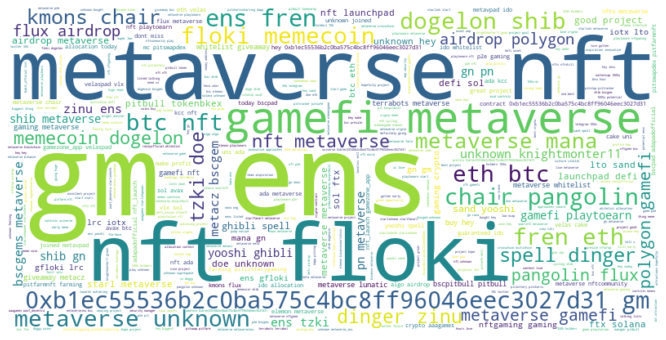

In [427]:
#draw a visually pleasant wordcloud
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(MV['text']))
import matplotlib.pyplot as plt
%matplotlib inline
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [428]:
# Tokenize the 'text' column
from textblob import TextBlob
MV['text'] = MV['text'].apply(lambda text: TextBlob(text).words)

In [430]:
# Stemming and Lemmatization of the 'text' column
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
MV['text']=MV['text'].apply(lambda text: ' '.join(stemmer.stem(word) for word in text))

In [431]:
from nltk import WordNetLemmatizer
lemztr = WordNetLemmatizer()
MV['text']=MV['text'].apply(lambda text: lemztr.lemmatize(text))

In [432]:
#sort the dateframe in descending order based on 'user_followers' column 
MV=MV.sort_values(by='user_followers',ascending=False)

In [433]:
# filter out all text whose author has more than 50,000 followers
MV_SA = MV.loc[MV.user_followers > 50000]

In [434]:
# Sentiment Analysis of the 'text' column
sample_size = MV_SA.shape[0]

def sentiment_func(x):
    sentiment = TextBlob(x['text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = MV_SA.sample(sample_size).apply(sentiment_func, axis=1)

<AxesSubplot:xlabel='user_followers', ylabel='polarity'>

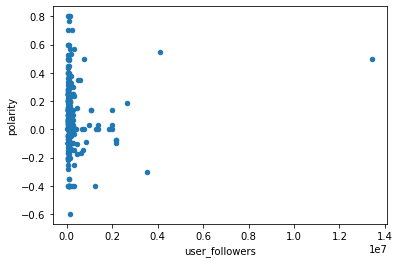

In [435]:
sample.plot.scatter('user_followers','polarity')

<AxesSubplot:xlabel='user_followers', ylabel='subjectivity'>

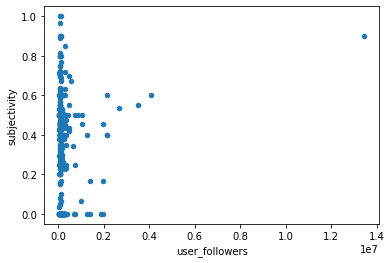

In [436]:
sample.plot.scatter('user_followers','subjectivity')

# Python Yahoo Finance Package

In [7]:
!pip install yfinance

In [160]:
#Roundhill is the world's first Metaverse ETF. My goal is to extract stock performance information and trend from the 
#top holdings in the ETF, excluding Amazon.com because the price of Amazon is too high compared to other stocks,
#making the comparison base way above the other stocks.

Roundhill=['Nvidia','Roblox','Microsoft','Meta Platforms','Unity Software','Apple','Taiwan Semiconductor Manufacturing Co. Ltd.',
           'Autodesk','Qualcomm','Tencent Holdings']
Ticker=['NVDA','RBLX','MSFT','FB','U','AAPL','TSM','ADSK','QCOM','TCEHY']

# Price Chart

In [161]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
#3.23.2020 was the day the stock market started its recovery journey after the crash due to Covid-19 concerns
#12.27.2021 was the day the stock market started going down from hitorical high due to response to Fed interest increase
#news becasue of inflated economy 
start_date = '2020-03-23'
end_date = '2021-12-27'

In [162]:
#To find the stock price formance over the bomming period
# Define the ticker list
tickers_list = Ticker

# Create placeholder for data
Price = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    Price[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']
    
Price.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,RBLX,MSFT,FB,U,AAPL,TSM,ADSK,QCOM,TCEHY
Date,,,,,,,,,,
2020-03-23,53.070309,NaN,133.800537,148.100006,NaN,55.402668,43.807224,144.139999,60.341751,46.172047
2020-03-24,62.175270,NaN,145.962418,160.979996,NaN,60.960960,47.301353,149.960007,63.169209,48.161366
2020-03-25,61.286980,NaN,144.565186,156.210007,NaN,60.625141,47.427181,149.990005,60.872513,48.986931
2020-03-26,64.186394,NaN,153.607895,163.339996,NaN,63.815422,48.269260,160.880005,66.566040,50.827049
2020-03-27,63.061066,NaN,147.300629,156.789993,NaN,61.173317,45.404270,141.570007,64.259674,48.290668


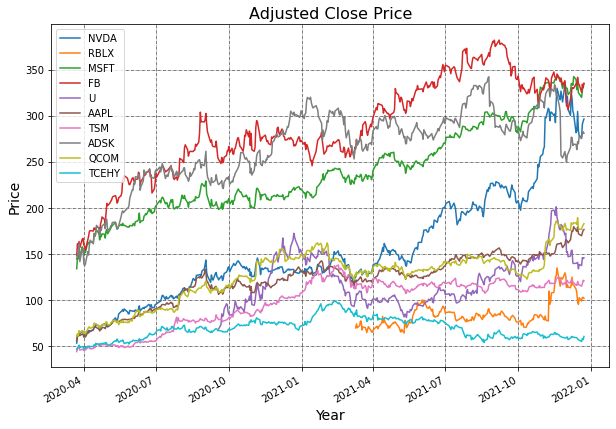

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot all the close prices
Price.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Moving Average Chart

In [165]:
#To have a better understanding of the trend of 'metaverse' related stocks, we calculate moving average of stock price 
#of the stocks
# Calculating the short-window simple moving average

short_rolling = Price.rolling(window=25).mean()
short_rolling.tail(5)

,NVDA,RBLX,MSFT,FB,U,AAPL,TSM,ADSK,QCOM,TCEHY
Date,,,,,,,,,,
2021-12-17,308.320262,116.0048,334.066454,332.332799,164.343600,164.734001,119.205029,283.126401,179.669637,59.9800
2021-12-20,307.253351,115.6492,333.418650,331.715199,161.969200,165.524401,119.074587,280.958400,180.163683,59.6648
2021-12-21,306.874822,115.4304,333.091998,331.180800,159.900800,166.444001,119.066852,279.119600,180.631868,59.4828
2021-12-22,306.555101,114.8940,332.864398,330.680400,157.856000,167.429601,119.215109,277.078399,180.642057,59.1764
2021-12-23,306.708135,113.9788,332.687198,330.459200,156.006801,168.341201,119.299529,275.095999,180.637706,59.0176


In [166]:
# Calculating the long-window simple moving average
long_rolling = Price.rolling(window=100).mean()
long_rolling.tail(5)

,NVDA,RBLX,MSFT,FB,U,AAPL,TSM,ADSK,QCOM,TCEHY
Date,,,,,,,,,,
2021-12-17,245.001675,90.0210,309.628130,345.506201,140.963901,151.744222,116.199391,300.246701,149.313232,60.5033
2021-12-20,245.807963,90.2394,309.972926,345.177501,141.224301,151.989620,116.196807,299.792901,149.582692,60.4318
2021-12-21,246.766145,90.4955,310.407363,344.956501,141.611501,152.265225,116.214364,299.385801,149.893051,60.3992
2021-12-22,247.731735,90.7401,310.901797,344.741501,141.984101,152.570719,116.268339,298.991201,150.230732,60.3556
2021-12-23,248.714827,90.9834,311.388216,344.581501,142.387801,152.864268,116.300740,298.525001,150.591036,60.3899


In [167]:
#to add a column that calculates the mean of moving average of the meta stock group each day.
short_rolling['Meta 25-days SMA']=short_rolling.mean(axis=1)
long_rolling['Meta 100-days SMA']=long_rolling.mean(axis=1)

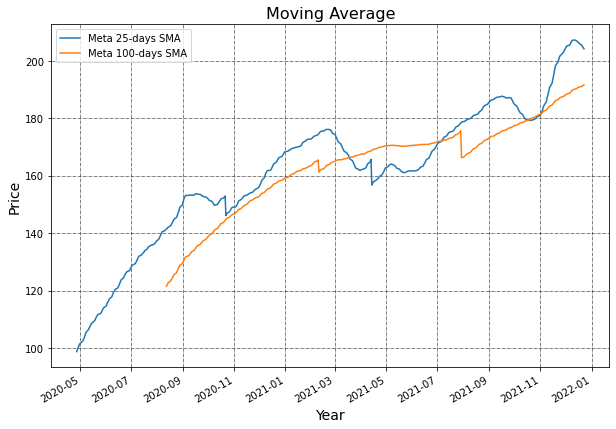

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot average moving prices
short_rolling['Meta 25-days SMA'].plot(figsize=(10, 7))
long_rolling['Meta 100-days SMA'].plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Moving Average", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# Moving Average Percentage Comparison Graph

In [170]:
#To compare number of days meta stocks' 100-days SMAs> 25-days SMAs to major indices(which are QQQ-Nasdaq 100 ETF,
#SPY-SP500 ETF, DIA-Dow Jones Industrial ETF, IWM-Russell 2000 ETF):
ComTicker=['NVDA','RBLX','MSFT','FB','U','AAPL','TSM','ADSK','QCOM','TCEHY','QQQ','SPY','DIA','IWM']

In [171]:
ComPrice = pd.DataFrame(columns=ComTicker)

# Fetch the data and make start date = 03.10.2021, which is latest ipo date of stock in the 
#meta stock group, which is Roblox.
for ticker in ComTicker:
    ComPrice[ticker] = yf.download(ticker, '2021-03-10', '2021-12-27')['Adj Close']
    
ComPrice.head(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,NVDA,RBLX,MSFT,FB,U,AAPL,TSM,ADSK,QCOM,TCEHY,QQQ,SPY,DIA,IWM
Date,,,,,,,,,,,,,,
2021-03-10,124.616699,69.500000,231.018829,264.899994,99.889999,119.423080,112.043777,263.640015,126.154175,84.364281,309.389496,384.455261,318.446838,225.085617
2021-03-11,129.866425,73.900002,235.700439,273.880005,106.599998,121.393875,118.687851,274.359985,129.972244,89.041763,316.515167,388.353333,320.416656,230.038651
2021-03-12,128.492157,69.699997,234.328751,268.399994,105.699997,120.468193,116.443634,268.109985,128.235855,82.349670,313.947540,388.876343,323.351654,231.395767
2021-03-15,131.842896,72.150002,233.394409,273.750000,109.669998,123.414452,117.211403,273.019989,129.873581,82.399544,317.301331,391.195435,325.104767,232.217972
2021-03-16,132.842361,77.000000,236.276947,279.279999,108.889999,124.987122,117.477165,275.010010,131.856598,81.432129,319.042969,390.702026,323.893311,228.334808


In [172]:
#to add two other dataframes calculate the mean of moving average of the meta stock group each day.
Com_short_rolling = ComPrice.rolling(window=25).mean()
Com_long_rolling = ComPrice.rolling(window=100).mean()

In [173]:
#to create a dataframe whose header is the same as ComPrice
Com_rolling = pd.DataFrame(columns = [i for i in Com_long_rolling.columns])

In [174]:
#to compare a stock's 25-days moving average to its 100-days moving average
for i in ComTicker:
    Com_rolling[i] = (Com_short_rolling[i] > Com_long_rolling[i])

In [175]:
#remove the first 100 rows because 100-days average start after 100 days.
Com_rolling=Com_rolling.drop(index=Com_rolling.index[:99], axis=0)

In [176]:
#calculate the percentage of trading days 25-days average is above 100-daysaverage
lst=[]
for i in ComTicker:
    lst.append(Com_rolling[i].value_counts('True').tolist())
lst=[a[0] for a in lst]
lst=[round(i,2) for i in lst]
lst

[1.0, 0.63, 1.0, 0.5, 1.0, 1.0, 0.59, 0.55, 0.7, 0.97, 1.0, 1.0, 0.89, 0.57]

In [177]:
#to add the percentage numbers to a new dataframe named Trend_MA
Trend_MA = pd.DataFrame(columns = [i for i in Com_long_rolling.columns])
Trend_MA.loc['Percentage']=lst
Trend_MA

,NVDA,RBLX,MSFT,FB,U,AAPL,TSM,ADSK,QCOM,TCEHY,QQQ,SPY,DIA,IWM
Percentage,1.0,0.63,1.0,0.5,1.0,1.0,0.59,0.55,0.7,0.97,1.0,1.0,0.89,0.57


In [178]:
#To sort the percentage in ascending order
Trend_MA_sorted= Trend_MA.sort_values('Percentage',axis=1)
Trend_MA_sorted

,FB,ADSK,IWM,TSM,RBLX,QCOM,DIA,TCEHY,NVDA,MSFT,U,AAPL,QQQ,SPY
Percentage,0.5,0.55,0.57,0.59,0.63,0.7,0.89,0.97,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:title={'center':'Moving Average Trend'}, ylabel='Uptick Percentage'>

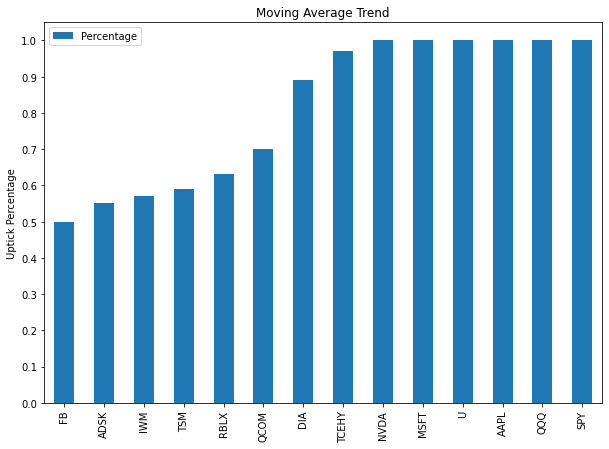

In [243]:
import matplotlib.pyplot as plt
import pandas as pd

Trend_MA_sorted.T.plot(kind='bar',title='Moving Average Trend',ylabel='Uptick Percentage',figsize=(10,7),yticks=np.linspace(0,1,11))


# RSI Histogram Chart